# Data Preprocessing on Titanic Dataset
The data
To take a look at the competition data, click on the Data tab at the top of the competition page. Then, scroll down to find the list of files.
There are three files in the data: (1) train.csv, (2) test.csv, and (3) gender_submission.csv.

(1) train.csv
train.csv contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table). To investigate this data, click on the name of the file on the left of the screen. Once you've done this, you can view all of the data in the window.

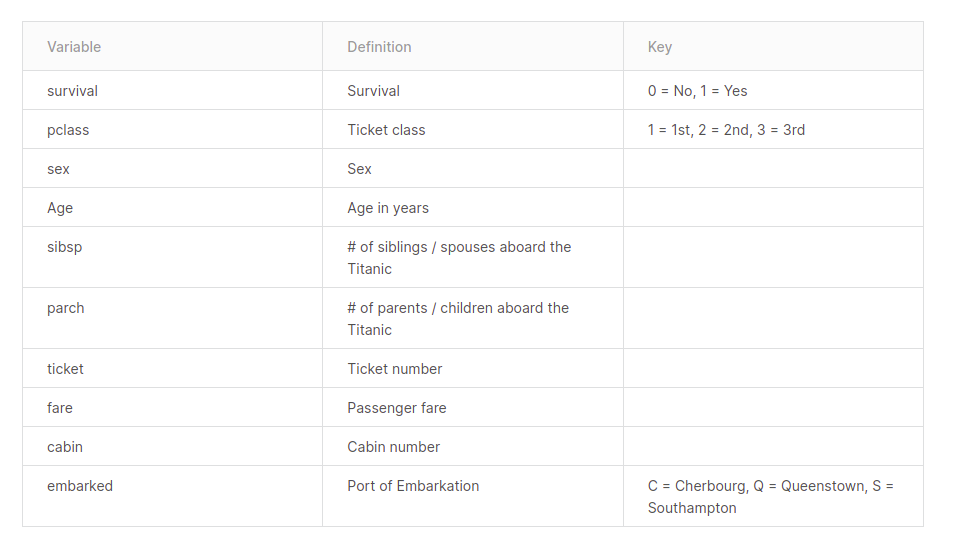

## Processing Steps
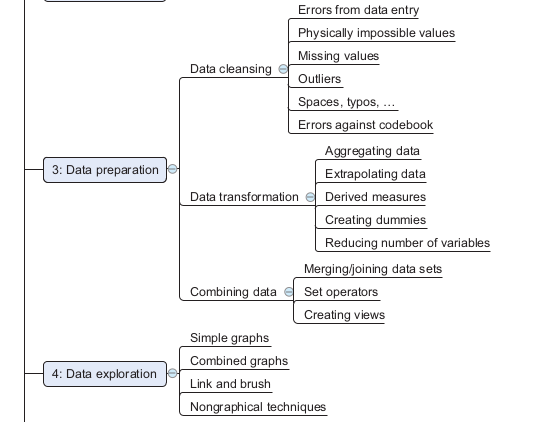

### Import Libraries

In [2]:
import numpy as np                 #Numpy is used for array manipulation and processing
import pandas as pd                #Pandas is used for table manipulation and processing
import matplotlib.pyplot as plt
import seaborn as sns              # A very useful library other than matplotlib for plotting

In [3]:
#Load Dataset into Pandas Dataframe
df = pd.read_csv('train.csv')

In [5]:
#read columnname of dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### The columns
Many of them are self-explanatory, but there are some that don't:

Embarked: Name of the port of embarkation

Parch: Number of parents/children aboard

SibSp: Number of siblings/spouses aboard

In [7]:
#Display first five samples
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#Display shape
df.shape

(891, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#Find missing value exist
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

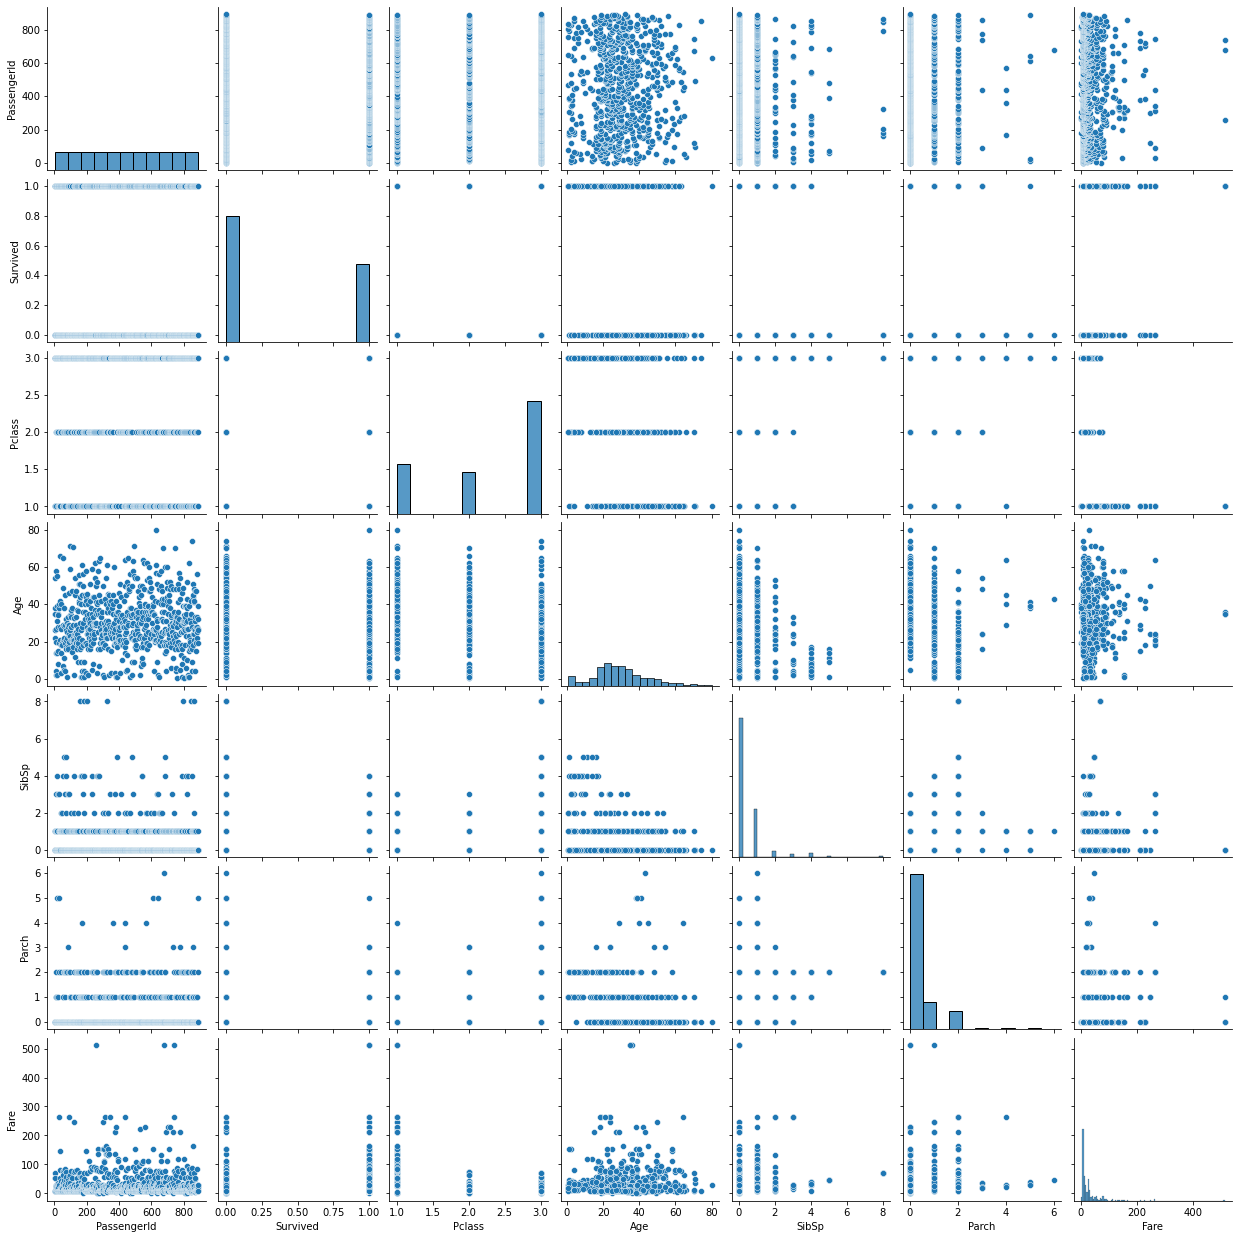

In [14]:
sns.pairplot(df)

## Correlations
Take some time to understand what's happening in the pairplots and heatmaps. There's plenty of information in those few lines. Parch and SibSp are strongly correlatied, so it gives you the chance to do some feature engineering. In the Train Heatmap(which has Survived as a column) we see that Pclass is strongly negative correlated, and that's because first class passengers had a better chance to survive.

In [21]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Text(0.5, 1.0, 'Correlations between Features in Test')

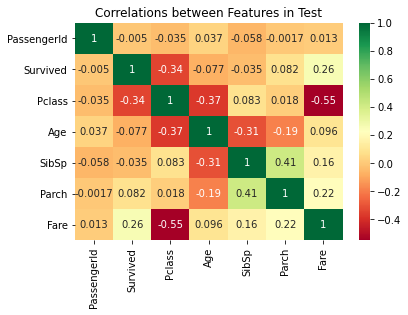

In [17]:
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn')
plt.title('Correlations between Features in Test')

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

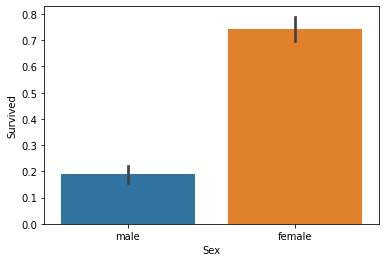

In [22]:
sns.barplot(x=df.Sex, y= df.Survived)

### Data Preprocessing
During this step we want to leave the data ready for modeling. You will:

Impute missing values: A model can't have missing values. You have to do something with them.

Handle your Outliers: values that are too large or too small compared to the rest.

Normalize and scale: These steps are not always necessary. It depends on your Machine Learning Model. Some models are based on relations of distances(like K-Nearest Neighbors), so normalizing and scaling is indispensable to maintain an equally weighted importance of your features. Other models like Decision Trees are not designed the same way. Anyway, this is a good practice, so in this notebook you'll leasrn the basics on how to do it.



#### Label Encoding: 
With the Sex column, Expensive Fare, and Small Family

In [23]:
 #The map method uses a dictionary to transform values on a Series object.
df.Sex = df.Sex.map(dict(female=1, male=0))

In [30]:
#Another method to replace values on column
df['Pclass'] = df['Pclass'].replace([3,1],[1,3]) 
print(df['Pclass'].head())


0    1
1    3
2    1
3    3
4    1
Name: Pclass, dtype: int64


In [35]:
df['Small Family'] = np.where((df['SibSp'] <= 2) & (df['SibSp'] != 0), 1, 0)
df['Lonely Child'] = np.where(df['Parch'] == 1, 1, 0)
df['Family'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Small Family,Lonely Child,Family
0,1,0,1,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1
2,3,1,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0,1
4,5,0,1,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,0


In [36]:
#Select Features
X = df[['Age', 'Pclass', 'Fare', 'Family','Lonely Child', 'Sex', 'Small Family','PassengerId']]
#Select Target
Y = df.Survived

In [37]:
X.head()

,Age,Pclass,Fare,Family,Lonely Child,Sex,Small Family,PassengerId
0,22.0,1,7.2500,1,0,0,1,1
1,38.0,3,71.2833,1,0,1,1,2
2,26.0,1,7.9250,0,0,1,0,3
3,35.0,3,53.1000,1,0,1,1,4
4,35.0,1,8.0500,0,0,0,0,5


### Normalization - Scaling
Scaling data means bringing all your feature values to a common scale, maintaining the individual relationships between each feature, this is, brinding each column of your dataframe to, say, values between 0 and 1. This makes sense: if a column has values between 1000 and 100000, and another between 0 and 1, some algorithms may incorrectly decide that the first feature is much more important than the second one. 

Normalizing is, well, changing the shape of your distributions to fit a normal one, said in very simple terms. The encoded features like "Sex" and "Pclass" are not normalized.



In [38]:
for i in range(4): # Run through all columns except encoded
    X.iloc[:,i] = X.iloc[:,i] / X.iloc[:,i].max()    # Scale each column dividing by maximum
    mean = X.iloc[:,i].mean()                        # Calculate column mean
    std = X.iloc[:,i].std()                          # Calculate column STD
    X.iloc[:,i] = (X.iloc[:,i] - mean)/std           # Normalie column
print(X.shape, X.head())

(891, 8)         Age    Pclass      Fare    Family  Lonely Child  Sex  Small Family  \
0 -0.530005 -0.826913 -0.502163  0.059127             0    0             1   
1  0.571430  1.565228  0.786404  0.059127             0    1             1   
2 -0.254646 -0.826913 -0.488580 -0.560660             0    1             0   
3  0.364911  1.565228  0.420494  0.059127             0    1             1   
4  0.364911 -0.826913 -0.486064 -0.560660             0    0             0   

   PassengerId  
0            1  
1            2  
2            3  
3            4  
4            5  


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### KNN Imputer
This kind of imputation uses KNNeighbors logic: it assings a value to the missing gaps depending on the nearests points values.

In [40]:
from sklearn.impute import KNNImputer 
imputer = KNNImputer() # Create the imputer object
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns) # Transform the data

In [43]:
X.describe()
X['Child'] = np.where(X['Age']< -1.5, 1, 0)
X['Expensive'] = np.where(X['Fare'] <= 0.14, 0, 1)

X.head()

,Age,Pclass,Fare,Family,Lonely Child,Sex,Small Family,PassengerId,Child,Expensive
0,-0.530005,-0.826913,-0.502163,0.059127,0.0,0.0,1.0,1.0,0,0
1,0.571430,1.565228,0.786404,0.059127,0.0,1.0,1.0,2.0,0,1
2,-0.254646,-0.826913,-0.488580,-0.560660,0.0,1.0,0.0,3.0,0,0
3,0.364911,1.565228,0.420494,0.059127,0.0,1.0,1.0,4.0,0,1
4,0.364911,-0.826913,-0.486064,-0.560660,0.0,0.0,0.0,5.0,0,0


#### Outliers
Without scaling and normalization, you could tend to get too many instances(each row of your dataset) when detecting outliers. Now that you have everything set up nicely, let's see how these new features look like, this time with boxplots

Text(0.5, 1.0, 'Distribution of the features')

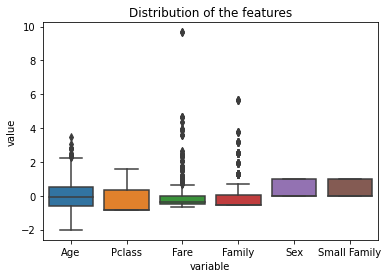

In [44]:
sns.boxplot(x = 'variable', y = 'value', data=pd.melt(X[['Age', 'Pclass', 'Fare', 'Family', 'Sex', 'Small Family']]))
plt.title('Distribution of the features')

In [46]:
for i in [0, 2, 3]:
    q1 = X.iloc[:,i].quantile(0.25) # Calculate 1 quartile
    q3 = X.iloc[:,i].quantile(0.75) # Calculate 3 quartile

    IQR = q3 - q1 # Interquartile range

    #defining max and min limits
    max_limit = q3 + (1.5 * IQR)
    min_limit = q1 - (1.5 * IQR) 

    #capping
    X.iloc[:,i] = pd.DataFrame(np.where(X.iloc[:,i] > max_limit, max_limit, 
             (np.where(X.iloc[:,i] < min_limit, min_limit,X.iloc[:,i] ))))

Text(0.5, 1.0, 'Distribution of the features')

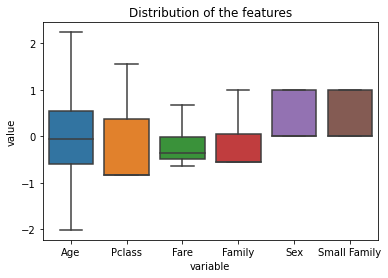

In [47]:
sns.boxplot(x = 'variable', y = 'value', data=pd.melt(X[['Age', 'Pclass', 'Fare', 'Family', 'Sex', 'Small Family']]))
plt.title('Distribution of the features')

In [48]:
X.shape

(891, 10)